<ipython-input-20-74ec1122208a>:59: RuntimeWarning: divide by zero encountered in power
  c1 = t1**(2*st-1)
<ipython-input-20-74ec1122208a>:60: RuntimeWarning: divide by zero encountered in log10
  t1 = np.log10(t1)
<ipython-input-20-74ec1122208a>:114: RuntimeWarning: divide by zero encountered in power
  c2 = t2**(2*st-1)
<ipython-input-20-74ec1122208a>:115: RuntimeWarning: divide by zero encountered in log10
  t2 = np.log10(t2)


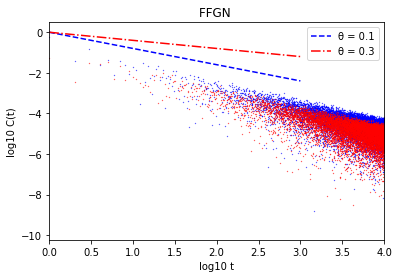

In [20]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np
time=2**15
N=50
B=2
noise0=0
list1=[]

#st=0.1
for t in range(1,time+1):
    for n in range(N):
        u=6*2**((-1*n))
        r=(math.e)**((-1*u))
        if t==1:
            a=np.random.uniform(0,1)
            X0=((1-r**2)**((-1*0.5)))*(a-0.5)
            W = np.sqrt((12 * (1 - r**2) * (pow(B,0.5-st) - pow(B,st-0.5)) * pow(a * pow(B,-n), 1-2*st)) / math.gamma(2-2*st))
            noise0=noise0+W*X0
          
        elif t==2:
            b=np.random.uniform(0,1)
            X1=r*X0+(b-0.5)
            W = np.sqrt((12 * (1 - r**2) * (pow(B,0.5-st) - pow(B,st-0.5)) * pow(a * pow(B,-n), 1-2*st)) / math.gamma(2-2*st))
            noise0=noise0+W*X1
            X0=X1
        else:
            b=np.random.uniform(0,1)
            X1=r*X1+(b-0.5)
            W = np.sqrt((12 * (1 - r**2) * (pow(B,0.5-st) - pow(B,st-0.5)) * pow(a * pow(B,-n), 1-2*st)) / math.gamma(2-2*st))
            noise0=noise0+W*X1
            X0=X1
    list1.append(noise0)
    noise0=0
    
S=0
c=0
listA=[]
listB=[]
d=int(time/2)
for l in range(1,d):
    i=0
    while i+l<time:
       S=S+list1[i]*list1[i+l]
       i=i+1
       c=c+1
    S=S/c
    if S<0:
        S=-S
    C=math.log10(S)
    d=math.log10(l)
    listA.append(d)
    listB.append(C)
    plt.plot(d,C,"b.",ms=0.55)
#标准st=0.1  
st=0.1
t1 = np.arange(0,1000)
c1 = t1**(2*st-1)
t1 = np.log10(t1)
c1 = np.log10(c1)
typ1,=plt.plot(t1,c1,'b',linestyle="--")

#st=0.3
st=0.3
list2=[]
for t in range(1,time+1):
    for n in range(50):
        u=6*2**((-1*n))
        r=(math.e)**((-1*u))
        if t==1:
            a=np.random.uniform(0,1)
            X0=((1-r**2)**((-1*0.5)))*(a-0.5)
            W = np.sqrt((12 * (1 - r**2) * (pow(B,0.5-st) - pow(B,st-0.5)) * pow(a * pow(B,-n), 1-2*st)) / math.gamma(2-2*st))
            noise0=noise0+W*X0          
        elif t==2:
            b=np.random.uniform(0,1)
            X1=r*X0+(b-0.5)
            W = np.sqrt((12 * (1 - r**2) * (pow(B,0.5-st) - pow(B,st-0.5)) * pow(a * pow(B,-n), 1-2*st)) / math.gamma(2-2*st))
            noise0=noise0+W*X1
            X0=X1
        else:
            b=np.random.uniform(0,1)
            X1=r*X1+(b-0.5)
            W = np.sqrt((12 * (1 - r**2) * (pow(B,0.5-st) - pow(B,st-0.5)) * pow(a * pow(B,-n), 1-2*st)) / math.gamma(2-2*st))
            noise0=noise0+W*X1
            X0=X1
    list2.append(noise0)
    noise0=0
    
S=0
c=0
listA=[]
listB=[]
d=int(time/2)
for l in range(1,d):
    i=0
    while i+l<time:
       S=S+list2[i]*list2[i+l]
       i=i+1
       c=c+1
    S=S/c
    if S<0:
        S=-S
    C=math.log10(S)
    d=math.log10(l)
    listA.append(d)
    listB.append(C)
    plt.plot(d,C,"r.",ms=0.55)
    
#标准st=0.3 
st=0.3
t2 = np.arange(0,1000)
c2 = t2**(2*st-1)
t2 = np.log10(t2)
c2 = np.log10(c2)
typ2,=plt.plot(t2,c2,'r',linestyle="-.")
plt.xlim(0,4)
plt.title('FFGN ')  
plt.ylabel("log10 C(t)")
plt.xlabel("log10 t")
plt.legend((typ1,typ2),('θ = 0.1','θ = 0.3'))
plt.show()

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
def ffgn(st,T):
    B=2
    a=6
    N=30
    n=np.arange(1,N+1,1,dtype=float)
    u=a*B**(-n)   #u(n)
    r=np.e**(-u)   #r(n)
    W=np.sqrt((12*(1-r**2)*(B**(0.5-st)-B**(st-0.5))*((a*B**(-n))**(1-2*st)))/np.random.gamma(2-2*st))
    uu_noise=np.random.uniform(0,1,[N,T])
    X=np.zeros((N,T))
    et=np.zeros(T)
    b=0
    for nx in range(N):             #main loop for FFGN
        X[nx,0]=(uu_noise[nx,0]-0.5)/(1-r[nx]**2)**0.5
        for t in range(T):
            X[nx,t]=r[nx]*X[nx,t-1]+(uu_noise[nx,t]-0.5)

    for t in range(T):
        for nx in range(N):
            b += X[nx,t]* W[nx]
        et[t]=b
        b=0
    return et

In [1]:
def ffgn(st,T):
    B=2
    a=6
    N=30
    n=np.arange(1,N+1,1,dtype=float)
    u=a*B**(-n)   #u(n)
    r=np.e**(-u)   #r(n)
    W=np.sqrt((12*(1-r**2)*(B**(0.5-st)-B**(st-0.5))*((a*B**(-n))**(1-2*st)))/np.random.gamma(2-2*st))
    uu_noise=np.random.uniform(0,1,[N,T])
    X=np.zeros((N,T))
    et=np.zeros(T)
    b=0
    for nx in range(N):             #main loop for FFGN
        X[nx,0]=(uu_noise[nx,0]-0.5)/(1-r[nx]**2)**0.5
        for t in range(T):
            X[nx,t]=r[nx]*X[nx,t-1]+(uu_noise[nx,t]-0.5)

    for t in range(T):
        for nx in range(N):
            b += X[nx,t]* W[nx]
        et[t]=b
        if et[t]<0:
            et[t]=0
        elif et[t]>=0:
            et[t]=1
        b=0

    return et

<ipython-input-2-648552504c37>:29: RuntimeWarning: divide by zero encountered in power
  c5 = t5**(2*0.1-1)
<ipython-input-2-648552504c37>:30: RuntimeWarning: divide by zero encountered in log10
  t5 = np.log10(t5)


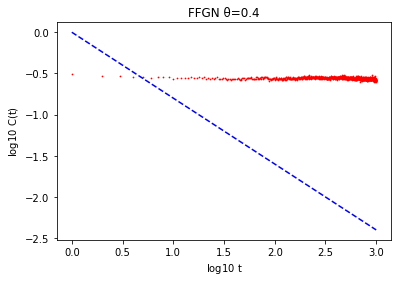

In [2]:
#关联性检验
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats
T=2000
A=ffgn(0.1,2000)
S=0
c=0
re=100
d=int(T/2)
for l in range(1,d):
    c=0
    i=0
    while i+l<T:
        for j in range(re):
            S+=A[i]*A[i+l]
        i=i+1
        c=c+1
    S=S/re/c
    if S<0:
        S=-S
    C=math.log10(S)     #关联度函数
    d=math.log10(l)
    plt.scatter(d,C,c='r',s=0.55)

    

t5 = np.arange(0,1000)
c5 = t5**(2*0.1-1)
t5 = np.log10(t5)
c5 = np.log10(c5)
typ5,=plt.plot(t5,c5,'blue',linestyle="--")
plt.title('FFGN ')  
plt.ylabel("log$10$ C(t)")
plt.xlabel("log$10$ t")
plt.show()


<ipython-input-52-387da9f6ff80>:123: RuntimeWarning: divide by zero encountered in power
  c1 = t1**(2*0.05-1)
<ipython-input-52-387da9f6ff80>:124: RuntimeWarning: divide by zero encountered in log10
  t1 = np.log10(t1)
<ipython-input-52-387da9f6ff80>:130: RuntimeWarning: divide by zero encountered in power
  c2 = t2**(2*0.15-1)
<ipython-input-52-387da9f6ff80>:131: RuntimeWarning: divide by zero encountered in log10
  t2 = np.log10(t2)
<ipython-input-52-387da9f6ff80>:137: RuntimeWarning: divide by zero encountered in power
  c3 = t3**(2*0.25-1)
<ipython-input-52-387da9f6ff80>:138: RuntimeWarning: divide by zero encountered in log10
  t3 = np.log10(t3)
<ipython-input-52-387da9f6ff80>:144: RuntimeWarning: divide by zero encountered in power
  c4 = t4**(2*0.35-1)
<ipython-input-52-387da9f6ff80>:145: RuntimeWarning: divide by zero encountered in log10
  t4 = np.log10(t4)
<ipython-input-52-387da9f6ff80>:151: RuntimeWarning: divide by zero encountered in power
  c5 = t5**(2*0.45-1)
<ipython-

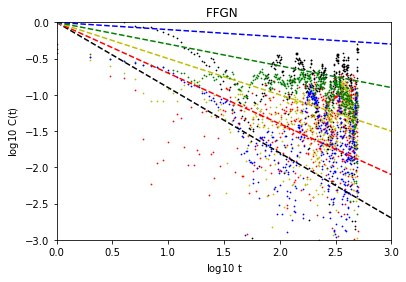

In [52]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats
B=2
a=6
N=30
T=1000
#st=0.05
A1=ffgn(0.05,1000)
listA=[]
listB=[]
d=int(T/2)
for l in range(1,d):
    i=0
    c=0
    while i+l<T:
        S+=A[i]*A[i+l]
        i=i+1
        c=c+1
    S=S/c
    if S<0:
        S=-S
    C=math.log10(S)
    d=math.log10(l)
    listA.append(d)
    listB.append(C)
    plt.scatter(d,C,c='black', s=0.55)

    
#st=0.15
A2=ffgn(0.15,1000)
listA=[]
listB=[]
d=int(T/2)
for l in range(1,d):
    i=0
    c=0
    while i+l<T:
        S+=A2[i]*A2[i+l]
        i=i+1
        c=c+1
    S=S/c
    if S<0:
        S=-S
    C=math.log10(S)
    d=math.log10(l)
    listA.append(d)
    listB.append(C)
    plt.scatter(d,C,c='r',s=0.55)
    
#st=0.25
A3=ffgn(0.25,1000)    
S=0
c=0
listA=[]
listB=[]
d=int(T/2)
for l in range(1,d):
    i=0
    c=0
    while i+l<T:
        S+=A3[i]*A3[i+l]
        i=i+1
        c=c+1
    S=S/c
    if S<0:
        S=-S
    C=math.log10(S)
    d=math.log10(l)
    listA.append(d)
    listB.append(C)
    plt.scatter(d,C,c='y', s=0.55)

#st=0.35
A4=ffgn(0.35,1000)   
S=0
c=0
listA=[]
listB=[]
d=int(T/2)
for l in range(1,d):
    i=0
    c=0
    while i+l<T:
        S+=A4[i]*A4[i+l]
        i=i+1
        c=c+1
    S=S/c
    if S<0:
        S=-S
    C=math.log10(S)
    d=math.log10(l)
    listA.append(d)
    listB.append(C)
    plt.scatter(d,C,c='green', s=0.55)

#st=0.45
A5=ffgn(0.45,1000)    
S=0
c=0
listA=[]
listB=[]
d=int(T/2)
for l in range(1,d):
    i=0
    c=0
    while i+l<T:
        S+=A5[i]*A5[i+l]
        i=i+1
        c=c+1
    S=S/c
    if S<0:
        S=-S
    C=math.log10(S)
    d=math.log10(l)
    listA.append(d)
    listB.append(C)
    plt.scatter(d,C,c='blue', s=0.55)

#st=0.05
t1 = np.arange(0,1000)
c1 = t1**(2*0.05-1)
t1 = np.log10(t1)
c1 = np.log10(c1)
typ1,=plt.plot(t1,c1,'black',linestyle="--")

#st=0.15
t2 = np.arange(0,1000)
c2 = t2**(2*0.15-1)
t2 = np.log10(t2)
c2 = np.log10(c2)
typ2,=plt.plot(t2,c2,'r',linestyle="--")

#st=0.25
t3 = np.arange(0,1000)
c3 = t3**(2*0.25-1)
t3 = np.log10(t3)
c3 = np.log10(c3)
typ3,=plt.plot(t3,c3,'y',linestyle="--")

#st=0.35
t4 = np.arange(0,1000)
c4 = t4**(2*0.35-1)
t4 = np.log10(t4)
c4 = np.log10(c4)
typ4,=plt.plot(t4,c4,'g',linestyle="--")

#st=0.45
t5 = np.arange(0,1000)
c5 = t5**(2*0.45-1)
t5 = np.log10(t5)
c5 = np.log10(c5)
typ5,=plt.plot(t5,c5,'blue',linestyle="--")




plt.ylim(-3,0)
plt.xlim(0,3)
plt.title('FFGN ')  
plt.ylabel("log$10$ C(t)")
plt.xlabel("log$10$ t")
plt.show()


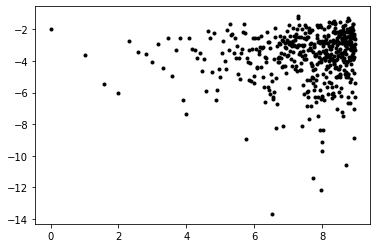

In [40]:
import matplotlib.pyplot as plt
import random
import math
time=1000
N=30
B=2
st=0.35
noise0=0
list1=[]

for t in range(1,time+1):
   
    for n in range(N):
        u=6*2**((-1*n))
        r=(math.e)**((-1*u))
        if t==1:
            a=random.uniform(0,1)
            X0=((1-r**2)**((-1*0.5)))*(a-0.5)
            W=((12*(1-r**2)*(B**((1/2)-st)-B**(st-(1/2)))*u**(1-2*st))/math.gamma(2-2*st))**(1/2)
            noise0=noise0+W*X0
        else:
            b=random.uniform(0,1)
            X1=r*X0+(b-0.5)
            W=((12*(1-r**2)*(B**((1/2)-st)-B**(st-(1/2)))*u**(1-2*st))/math.gamma(2-2*st))**(1/2)
            noise0=noise0+W*X1
            X0=X1
    list1.append(noise0)
    noise0=0
    


S=0
c=0
listA=[]
listB=[]
d=int(time/2)
for l in range(1,d):
    i=0
    c=0
    while i+l<time:
       S=S+list1[i]*list1[i+l]
       i=i+1
       c=c+1
    S=S/c
    if S<0:
        S=-S
    C=math.log2(S)
    d=math.log2(l)
    listA.append(d)
    listB.append(C)
    plt.plot(d,C,"k.")
plt.show()

In [39]:
c

374250

<ipython-input-58-7a647d22fc0c>:55: RuntimeWarning: divide by zero encountered in power
  c1 = t1**(2*st-1)
<ipython-input-58-7a647d22fc0c>:56: RuntimeWarning: divide by zero encountered in log10
  t1 = np.log10(t1)


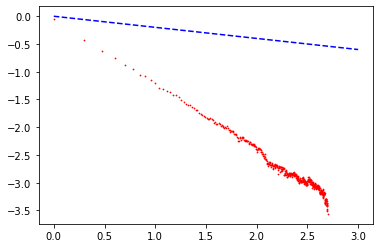

In [58]:
import matplotlib.pyplot as plt
import math
import numpy as np
B=2
a=6
N=50
st=0.4          #θ
T=1000
n=np.arange(1,N+1,1,dtype=float)
u=np.zeros(N)   #u(n)
r=np.zeros(N)   #r(n)
W=np.zeros(N)
uu_noise=np.random.uniform(0,1,[T,N])
X=np.zeros((T,N))
et=np.zeros(T)
b = 0
for t in range(T):             #main loop for FFGN
    for nx in range(N):
        if t==0:
            u[nx]=a*B**(-n[nx])    #u(n)
            r[nx]=np.e**(-u[nx])   #r(n)
            X[0,nx]=(uu_noise[0,nx]-0.5)/(1-r[nx]**2)**0.5
            W[nx]=((12*(1-r[nx]**2)*(B**((1/2)-st)-B**(st-(1/2)))*u[nx]**(1-2*st))/math.gamma(2-2*st))**(1/2)
            b += X[0,nx]* W[nx]
        elif t>0:
            u[nx]=a*B**float(-n[nx])    #u(n)
            r[nx]=np.e**float(-u[nx])   #r(n)
            X[t,nx]=r[nx]*X[t-1,nx]+(uu_noise[t,nx]-0.5)
            W[nx]=((12*(1-r[nx]**2)*(B**((1/2)-st)-B**(st-(1/2)))*u[nx]**(1-2*st))/math.gamma(2-2*st))**(1/2)
            b += X[t,nx]* W[nx]
    et[t] = b
    b = 0
ffgn=et
S=0
c=0

S=0
c=0
listA=[]
listB=[]
d=int(T/2)
for l in range(1,d):
    i=0
    while i+l<T:
        S += ffgn[i]*ffgn[i+l]
        i += 1
        c += 1
    S=S/c
    if S < 0:
        S=-S
    C=math.log10(S)
    d=math.log10(l)
    plt.scatter(d,C,c='r', s=0.55)
t1 = np.arange(0,1000)
c1 = t1**(2*st-1)
t1 = np.log10(t1)
c1 = np.log10(c1)
typ1,=plt.plot(t1,c1,'b',linestyle="--")
plt.show()

In [59]:
S

0.00027398723043026857

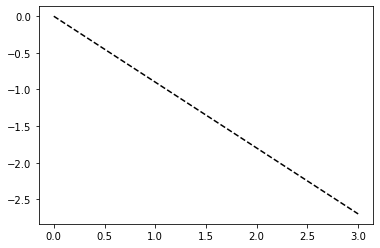

In [15]:
from scipy import stats
t1 = np.arange(1000000,1100000)
t2 = np.arange(1,1001)
c1 = t1**(2*st-1)
t1 = np.log10(t1)
t2 = np.log10(t2)
c1 = np.log10(c1)
res = stats.linregress(t1,c1)
plt.plot(t2,res.slope*t2+res.intercept,'black',linestyle="--")
plt.show() 


In [10]:
t

-0.8999999999999998

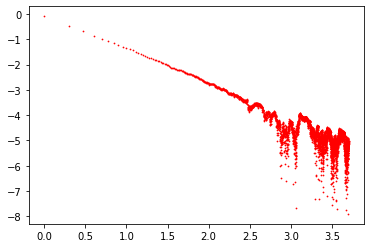

In [16]:
S=0
c=0
listA=[]
listB=[]
d=int(T/2)
for l in range(1,d):
    i=0
    while i+l<T:
       S += ffgn[i]*ffgn[i+l]
       i += 1
       c += 1
    S=S/c
    if S < 0:
        S=-S
    C=math.log10(S)
    d=math.log10(l)
    plt.scatter(d,C,c='r', s=0.55)

plt.show()
   

In [38]:
ffgn

array([ 0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0.,
       -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [36]:
n[nx]

1

In [32]:
et=np.zeros(N)
et

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])